Exercise from Think Stats, 2nd Edition (thinkstats2.com)<br>
Allen Downey

Read the pregnancy file.

In [30]:
%matplotlib inline

import nsfg
import thinkstats2
import thinkplot
import random

preg = nsfg.ReadFemPreg()

Select live births, then make a CDF of <tt>totalwgt_lb</tt>. 

In [6]:
live = preg[preg.outcome == 1]
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]
cdf = thinkstats2.Cdf(live.totalwgt_lb)
cdf

Cdf([  0.125    0.3125   0.4375   0.5625   0.625    0.9375   1.       1.0625
   1.125    1.1875   1.25     1.3125   1.375    1.4375   1.5      1.5625
   1.625    1.6875   1.75     1.8125   1.875    2.       2.0625   2.125
   2.1875   2.25     2.3125   2.375    2.4375   2.5      2.5625   2.6875
   2.75     2.8125   2.875    2.9375   3.       3.0625   3.125    3.25
   3.3125   3.375    3.4375   3.5      3.5625   3.625    3.6875   3.75
   3.8125   3.875    3.9375   4.       4.0625   4.125    4.1875   4.25
   4.3125   4.375    4.4375   4.5      4.5625   4.625    4.6875   4.75
   4.8125   4.875    4.9375   5.       5.0625   5.125    5.1875   5.25
   5.3125   5.375    5.4375   5.5      5.5625   5.625    5.6875   5.75
   5.8125   5.875    5.9375   6.       6.0625   6.125    6.1875   6.25
   6.3125   6.375    6.4375   6.5      6.5625   6.625    6.6875   6.75
   6.8125   6.875    6.9375   7.       7.0625   7.125    7.1875   7.25
   7.3125   7.375    7.4375   7.5      7.5625   7.625    7.6875   

Display the CDF.

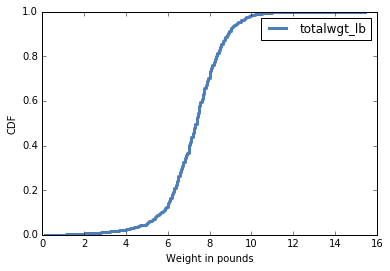

In [11]:
thinkplot.Cdf(cdf, label='totalwgt_lb')
thinkplot.Show(xlabel="Weight in pounds", ylabel="CDF")

Find out how much you weighed at birth, if you can, and compute CDF(x). 

I am not exactly sure how much I weighted but I will go ahead and assume around 7lbs. Therefore,

In [13]:
my_weight = 7
print cdf.Prob(my_weight)

0.401858818323


If you are a first child, look up your birthweight in the CDF of first children; otherwise use the CDF of other children.

Yeap, I am the first child, therefore I can apply my birth weight.

In [14]:
firsts_cdf = thinkstats2.Cdf(firsts.totalwgt_lb)
print firsts_cdf.Prob(my_weight)

0.418060967224


Compute the percentile rank of your birthweight

In [22]:
count = 0
for i in live.totalwgt_lb:
    if  i<=my_weight:
        count+=1
res_portion = 1.0*count/len(live.totalwgt_lb)
res = res_portion*100.0
res

39.70266724967206

Compute the median birth weight by looking up the value associated with p=0.5.

In [16]:
cdf.Percentile(50)

7.375

Compute the interquartile range (IQR) by computing percentiles corresponding to 25 and 75. 

In [17]:
IQR = cdf.Percentile(75) - cdf.Percentile(25)
IQR

1.625

Make a random selection from <tt>cdf</tt>.

In [18]:
random_sel = cdf.Random()
random_sel

9.75

Draw a random sample from <tt>cdf</tt>.

In [19]:
print cdf.Sample(25)

[ 8.125   8.625   6.1875  8.3125  5.375   7.4375  8.75    6.375   7.      8.
  5.      6.5625  4.375   6.5     9.3125  6.9375  8.1875  7.125   5.25
  7.9375  7.8125  5.875   6.75    9.5     3.25  ]


Draw a random sample from <tt>cdf</tt>, then compute the percentile rank for each value, and plot the distribution of the percentile ranks.

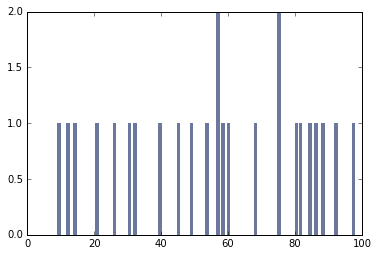

In [29]:
random_sample = cdf.Sample(25)
lst = []

for s in random_sample:
    count = 0
    for i in live.totalwgt_lb:
        if  i<=s:
            count+=1
    res_portion = 1.0*count/len(live.totalwgt_lb)
    res = res_portion*100.0
    lst.append(res)

thinkplot.Hist(thinkstats2.Hist(lst))
thinkplot.Show()

Generate 1000 random values using <tt>random.random()</tt> and plot their PMF.

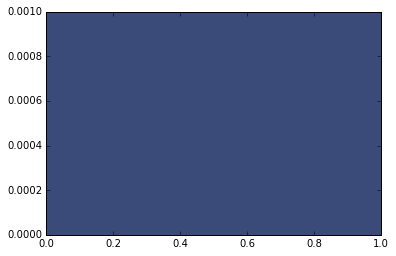

In [32]:
lst_random = []
for i in range(1000):
    lst_random.append(random.random())

thinkplot.Pmf(thinkstats2.Pmf(lst_random))
thinkplot.Show()

Assuming that the PMF doesn't work very well, try plotting the CDF instead.

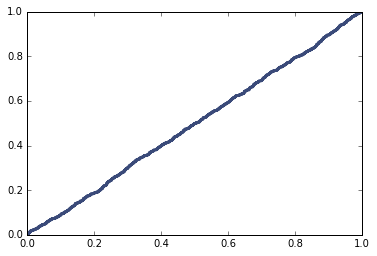

In [33]:
thinkplot.Cdf(thinkstats2.Cdf(lst_random))
thinkplot.Show()

### Clarifying Questions

Use this space to ask questions regarding the content covered in the reading. These questions should be restricted to helping you better understand the material. For questions that push beyond what is in the reading, use the next answer field. If you don't have a fully formed question, but are generally having a difficult time with a topic, you can indicate that here as well.

### Enrichment Questions

Use this space to ask any questions that go beyond (but are related to) the material presented in this reading. Perhaps there is a particular topic you'd like to see covered in more depth. Perhaps you'd like to know how to use a library in a way that wasn't show in the reading. One way to think about this is what additional topics would you want covered in the next class (or addressed in a followup e-mail to the class). I'm a little fuzzy on what stuff will likely go here, so we'll see how things evolve.

### Additional Resources / Explorations

If you found any useful resources, or tried some useful exercises that you'd like to report please do so here. Let us know what you did, what you learned, and how others can replicate it.